# Data Analysis 

## Read Data 

<a id='goback'></a>
## Table of Content:
[1. Histogram (Density Plot) & Quantile Quantile (q-q)Plot](#h1)<br>
[2. Applying Rescaling (Statistical Transformation)](#h2)<br>
[3. Function for creating histogram df](#h3)<br>
[4. Box Plot](#h4)<br>
> [4(i). Function for box plot description (percentile method)](#h4.1)


[5. Scatter & Regression](#h5)<br>
> [5(i). Methos to find best correlation variables](#h5.1)


[6. Bar chart](#h6)<br>
[7. Side by side box plot](#h7)<br>
[8. Row & column proportion](#h8)<br>
> [8(i). Row proportion Function](#h8.1)<br>
[8(ii). Column proportion Function](#h8.2)<br>


[9. Stacked Bar chart OR Segmented bar plot](#h9)<br>
> [9(i). Stacked Bar chart with numbers](#h9.1)<br>
[9(ii). Stacked Bar chart with proportion](#h9.2)<br>


In [167]:
import pandas as pd
import numpy as np

In [168]:
df = pd.read_csv("E:/DS projects csv files/brfss_2013.csv")

## Basic Understanding of data 

In [172]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_AGE80,_IMPEDUC,_IMPMRTL,_IMPHOME,RCSBRAC1,RCSRACE1,RCHISLA1,RCSBIRTH,TYPEINDS,TYPEWORK
0,1.0,1.0,b'01092013',b'01',b'09',b'2013',1100.0,2.013001e+09,2.013001e+09,1.0,...,60.0,6.0,2.0,1.0,NaN,b'',b'',b'',b'',b''
1,1.0,1.0,b'01192013',b'01',b'19',b'2013',1100.0,2.013001e+09,2.013001e+09,1.0,...,50.0,5.0,1.0,1.0,NaN,b'',b'',b'',b'',b''
2,1.0,1.0,b'01192013',b'01',b'19',b'2013',1100.0,2.013001e+09,2.013001e+09,1.0,...,55.0,6.0,1.0,1.0,NaN,b'',b'',b'',b'',b''
3,1.0,1.0,b'01112013',b'01',b'11',b'2013',1100.0,2.013001e+09,2.013001e+09,1.0,...,64.0,4.0,1.0,1.0,NaN,b'',b'',b'',b'',b''
4,1.0,2.0,b'02062013',b'02',b'06',b'2013',1100.0,2.013001e+09,2.013001e+09,1.0,...,66.0,6.0,1.0,1.0,NaN,b'',b'',b'',b'',b''


In [173]:
df.tail()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_AGE80,_IMPEDUC,_IMPMRTL,_IMPHOME,RCSBRAC1,RCSRACE1,RCHISLA1,RCSBIRTH,TYPEINDS,TYPEWORK
491768,72.0,11.0,b'12072013',b'12',b'07',b'2013',1100.0,2.013006e+09,2.013006e+09,1.0,...,38.0,6.0,6.0,1.0,NaN,b'',b'',b'',b'',b''
491769,72.0,11.0,b'12102013',b'12',b'10',b'2013',1100.0,2.013006e+09,2.013006e+09,1.0,...,55.0,4.0,1.0,1.0,NaN,b'',b'',b'',b'',b''
491770,72.0,11.0,b'12102013',b'12',b'10',b'2013',1100.0,2.013006e+09,2.013006e+09,1.0,...,39.0,6.0,1.0,1.0,NaN,b'',b'',b'',b'',b''
491771,72.0,12.0,b'12272013',b'12',b'27',b'2013',1100.0,2.013006e+09,2.013006e+09,1.0,...,35.0,6.0,1.0,3.0,NaN,b'',b'',b'',b'',b''
491772,72.0,12.0,b'12272013',b'12',b'27',b'2013',1100.0,2.013006e+09,2.013006e+09,1.0,...,62.0,5.0,3.0,1.0,NaN,b'',b'',b'',b'',b''


In [174]:
df.columns

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENUM',
       ...
       '_AGE80', '_IMPEDUC', '_IMPMRTL', '_IMPHOME', 'RCSBRAC1', 'RCSRACE1',
       'RCHISLA1', 'RCSBIRTH', 'TYPEINDS', 'TYPEWORK'],
      dtype='object', length=336)

In [175]:
len(df)

491773

In [176]:
df.dtypes

_STATE      float64
FMONTH      float64
IDATE        object
IMONTH       object
IDAY         object
             ...   
RCSRACE1     object
RCHISLA1     object
RCSBIRTH     object
TYPEINDS     object
TYPEWORK     object
Length: 336, dtype: object

In [177]:
df.describe()

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,...,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,_AGE80,_IMPEDUC,_IMPMRTL,_IMPHOME,RCSBRAC1
count,491773.000000,491773.000000,491773.000000,4.917730e+05,4.917730e+05,491737.0,360079.000000,44.0,360071.0,356564.0,...,491773.000000,491773.000000,165431.000000,165431.000000,452956.000000,491773.000000,491773.000000,491773.000000,491773.000000,0.0
mean,29.070636,6.373064,1111.906510,2.013006e+09,2.013006e+09,1.0,1.000122,1.0,1.0,1.0,...,1.687947,1.758104,2.147868,2.357067,1.951885,54.782522,4.853382,2.228225,1.315768,NaN
std,15.527832,3.442377,32.386542,5.508544e+03,5.508544e+03,0.0,0.011054,0.0,0.0,0.0,...,2.155820,2.148550,2.336748,2.677154,1.412048,17.032423,1.056415,1.582558,0.549435,NaN
min,1.000000,1.000000,1100.000000,2.013000e+09,2.013000e+09,1.0,1.000000,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,NaN
25%,17.000000,3.000000,1100.000000,2.013002e+09,2.013002e+09,1.0,1.000000,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,42.000000,4.000000,1.000000,1.000000,NaN
50%,27.000000,6.000000,1100.000000,2.013005e+09,2.013005e+09,1.0,1.000000,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,2.000000,57.000000,5.000000,1.000000,1.000000,NaN
75%,41.000000,9.000000,1100.000000,2.013008e+09,2.013008e+09,1.0,1.000000,1.0,1.0,1.0,...,1.000000,1.000000,2.000000,2.000000,2.000000,68.000000,6.000000,3.000000,2.000000,NaN
max,72.000000,12.000000,1200.000000,2.013034e+09,2.013034e+09,1.0,2.000000,1.0,1.0,1.0,...,9.000000,9.000000,9.000000,9.000000,9.000000,80.000000,6.000000,6.000000,3.000000,NaN


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491773 entries, 0 to 491772
Columns: 336 entries, _STATE to TYPEWORK
dtypes: float64(324), object(12)
memory usage: 1.2+ GB


[Go back](#goback)

<a id='h1'></a>
### 1- Histogram (Density Plot) & Quantile Quantile (q-q)Plot 

In [10]:
df['_STATE'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: _STATE, dtype: float64

In [11]:
df['_STATE'].value_counts()

12.0    34186
20.0    23282
31.0    17139
25.0    15071
27.0    14340
8.0     13649
34.0    13386
24.0    13011
49.0    12769
26.0    12759
39.0    11971
6.0     11518
42.0    11429
53.0    11162
21.0    11013
48.0    10917
45.0    10717
18.0    10338
30.0     9693
35.0     9316
36.0     8979
37.0     8860
51.0     8464
40.0     8244
19.0     8157
13.0     8138
23.0     8097
15.0     7858
38.0     7806
9.0      7710
28.0     7453
29.0     7118
46.0     6895
55.0     6589
44.0     6531
1.0      6503
33.0     6463
56.0     6454
50.0     6392
72.0     6011
41.0     5949
54.0     5899
47.0     5815
16.0     5630
17.0     5608
5.0      5268
22.0     5251
10.0     5206
32.0     5101
11.0     4931
2.0      4578
4.0      4252
66.0     1897
Name: _STATE, dtype: int64

In [12]:
df['_STATE'].dtype

dtype('float64')

In [13]:
df['_STATE'].max()

72.0

In [14]:
df['_STATE'].min()

1.0

In [15]:
df['_STATE'].mean(),df['_STATE'].std()

(29.070636248838387, 15.527832289716184)

In [16]:
hist,bin_edges = np.histogram(df['_STATE'])

In [17]:
# lets round the bin edges
bin_edges = np.round(bin_edges,0)
bin_edges

array([ 1.,  8., 15., 22., 29., 36., 44., 51., 58., 65., 72.])

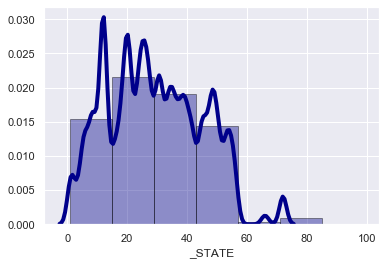

In [179]:
# Density Plot and Histogram of sates

import seaborn as sns
sns.distplot(df['_STATE'], hist=True, kde=True,
             bins = bin_edges,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

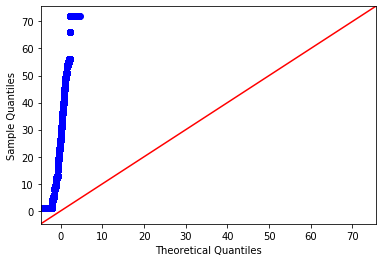

In [19]:
# q-q plot for above distribution

from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
#import statsmodels.formula.api as sm
import pylab

sm.qqplot(df['_STATE'], line='45')
pylab.show()


[Go back](#goback)

<a id='h2'></a>
### 2- Applying Rescaling(Statistical Transformations)

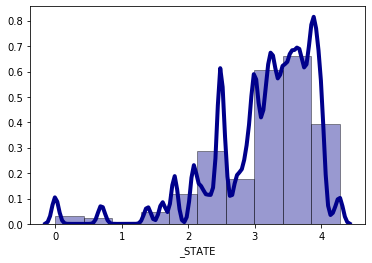

In [20]:
# (i) apply log transformation

a = np.log(df['_STATE'])

hist,bin_edges = np.histogram(a)

sns.distplot(a, hist=True, kde=True,
             bins = bin_edges,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

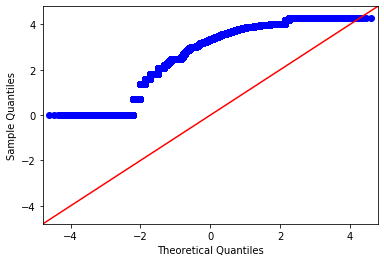

In [21]:
sm.qqplot(a, line='45')
pylab.show()


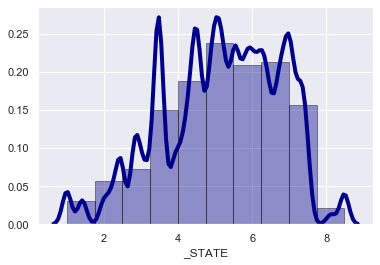

In [180]:
# (ii)apply sqrt transformation

a = np.sqrt(df['_STATE'])

hist,bin_edges = np.histogram(a)

sns.distplot(a, hist=True, kde=True,
             bins = bin_edges,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

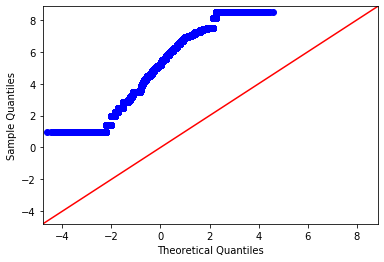

In [23]:
sm.qqplot(a, line='45')
pylab.show()

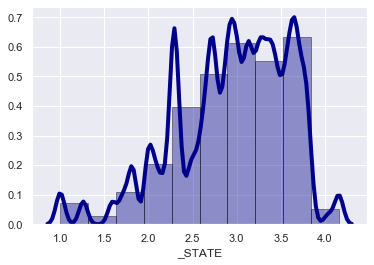

In [181]:
# (iii)applying cube root transformation

a = np.cbrt(df['_STATE'])

hist,bin_edges = np.histogram(a)

sns.distplot(a, hist=True, kde=True,
             bins = bin_edges,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

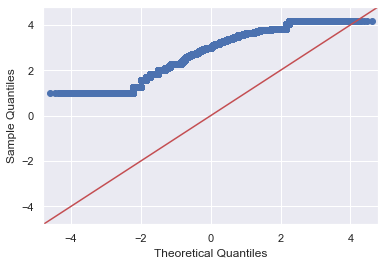

In [182]:
sm.qqplot(a, line='45')
pylab.show()

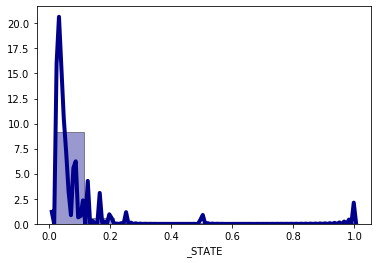

In [26]:
# apply inverse transformation

a = 1/df['_STATE']

hist,bin_edges = np.histogram(a)

sns.distplot(a, hist=True, kde=True,
             bins = bin_edges,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

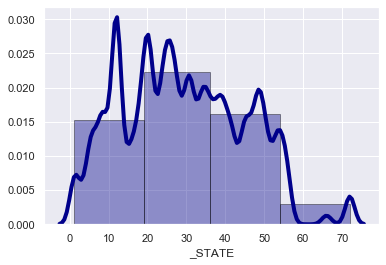

In [183]:
# (iv)apply binned transformation

a = df['_STATE']

hist,bin_edges = np.histogram(a, 4) # is parameter ko change kar kar k dekh sakte hain

bin_edges = np.round(bin_edges,0)

sns.distplot(a, hist=True, kde = True,
             bins = bin_edges,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


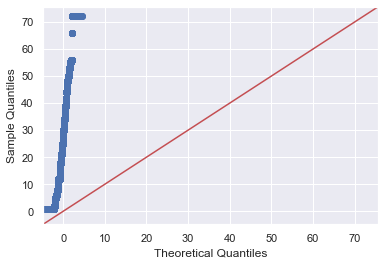

In [184]:
sm.qqplot(a, line='45')
pylab.show()

In [29]:
# now we make histogram of 2 more numerical vars

In [30]:
df.dtypes.head(10)

_STATE      float64
FMONTH      float64
IDATE        object
IMONTH       object
IDAY         object
IYEAR        object
DISPCODE    float64
SEQNO       float64
_PSU        float64
CTELENUM    float64
dtype: object

In [31]:
# first check df

In [32]:
df['FMONTH'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    2.0
Name: FMONTH, dtype: float64

In [33]:
df['FMONTH'].value_counts()

7.0     47639
1.0     46003
10.0    45007
4.0     44861
2.0     40549
3.0     40314
8.0     39660
5.0     39362
11.0    38348
6.0     37118
9.0     36833
12.0    36079
Name: FMONTH, dtype: int64

[Go back](#goback)

<a id='h3'></a>
### 3- Function for creating Histogram info df

In [34]:
# function for making histogram of a var

def make_hist_df(hist, bin_edges):
    
    range_list = []
    count_list = []

    for i in range(len(hist)):

        range_list.append(str(bin_edges[i])+" - "+str(bin_edges[i+1]))

        count_list.append(hist[i])
        
    histogram_df = pd.DataFrame({"Ranges(Bin-edges)": range_list,
                            "Count(hist)": count_list})

    return histogram_df

In [35]:
hist,bin_edges = np.histogram(df['FMONTH'])

# lets round the bin edges
bin_edges = np.round(bin_edges,0)
bin_edges

a = make_hist_df(hist, bin_edges)
a

,Ranges(Bin-edges),Count(hist)
0,1.0 - 2.0,86552
1,2.0 - 3.0,40314
2,3.0 - 4.0,44861
3,4.0 - 5.0,39362
4,5.0 - 6.0,37118
5,6.0 - 8.0,47639
6,8.0 - 9.0,39660
7,9.0 - 10.0,36833
8,10.0 - 11.0,45007
9,11.0 - 12.0,74427


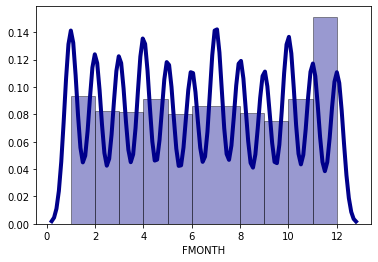

In [36]:
sns.distplot(df['FMONTH'], hist=True, kde=True,
             bins = bin_edges,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

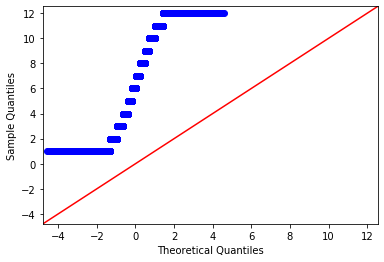

In [37]:
sm.qqplot(df['FMONTH'], line='45')
pylab.show()

In [38]:
df['FMONTH'].mean(),df['FMONTH'].std()

(6.373064401664996, 3.442377368202877)

In [39]:
df['PHYSHLTH'].value_counts()

88.0    304262
30.0     38343
2.0      26768
1.0      20115
3.0      15860
5.0      14223
10.0     10569
15.0      9541
7.0       9071
77.0      8712
4.0       8360
20.0      6203
14.0      5164
25.0      2510
6.0       2420
99.0      2233
8.0       1542
21.0      1270
12.0      1018
28.0       969
29.0       450
9.0        352
18.0       318
16.0       258
27.0       241
17.0       172
26.0       140
13.0       139
24.0       138
22.0       130
11.0       113
23.0        99
19.0        60
Name: PHYSHLTH, dtype: int64

In [40]:
hist,bin_edges = np.histogram(df['PHYSHLTH'].dropna())

# lets round the bin edges
bin_edges = np.round(bin_edges,0)

a = make_hist_df(hist, bin_edges)
a

,Ranges(Bin-edges),Count(hist)
0,1.0 - 11.0,109280
1,11.0 - 21.0,22986
2,21.0 - 30.0,44290
3,30.0 - 40.0,0
4,40.0 - 50.0,0
5,50.0 - 60.0,0
6,60.0 - 70.0,0
7,70.0 - 79.0,8712
8,79.0 - 89.0,304262
9,89.0 - 99.0,2233


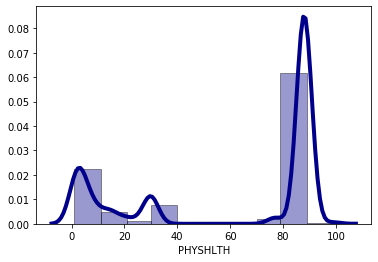

In [41]:
sns.distplot(df['PHYSHLTH'].dropna(), hist=True, kde=True,
             bins = bin_edges,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

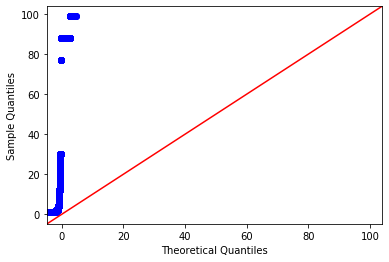

In [42]:
sm.qqplot(df['PHYSHLTH'].dropna(), line='45')
pylab.show()

In [43]:
# It seems to be left skewed, so we apply transformations on it to make it symmetric

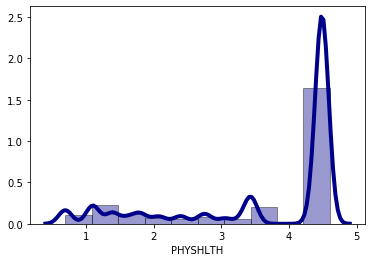

In [44]:
# apply log transformation

a = np.log((df['PHYSHLTH']+1).dropna())

hist,bin_edges = np.histogram(a)

sns.distplot(a, hist=True, kde=True,
             bins = bin_edges,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

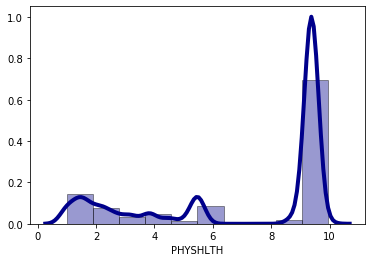

In [45]:
# apply sqrt transformation

a = np.sqrt(df['PHYSHLTH'].dropna())

hist,bin_edges = np.histogram(a)

sns.distplot(a, hist=True, kde=True,
             bins = bin_edges,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

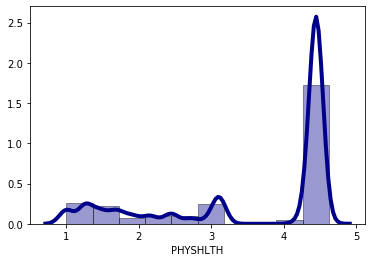

In [46]:
# apply cbrt transformation

a = np.cbrt(df['PHYSHLTH'].dropna())

hist,bin_edges = np.histogram(a)

sns.distplot(a, hist=True, kde=True,
             bins = bin_edges,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

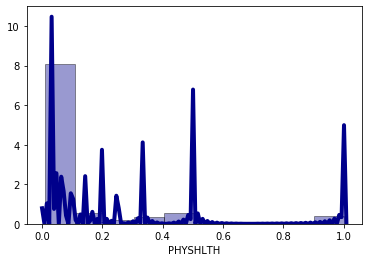

In [47]:
# apply inverse transformation

a = 1/df['PHYSHLTH'].dropna()

hist,bin_edges = np.histogram(a)

sns.distplot(a, hist=True, kde=True,
             bins = bin_edges,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

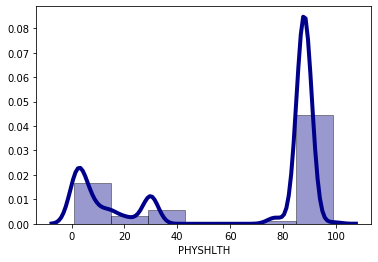

In [48]:
# apply binned transformation

a = df['PHYSHLTH'].dropna()

hist,bin_edges = np.histogram(a,7)

sns.distplot(a, hist=True, kde=True,
             bins = bin_edges,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

[Go back](#goback)

<a id='h4'></a>
### 4- Box Plot

In [49]:
# Now we'll make Box plot

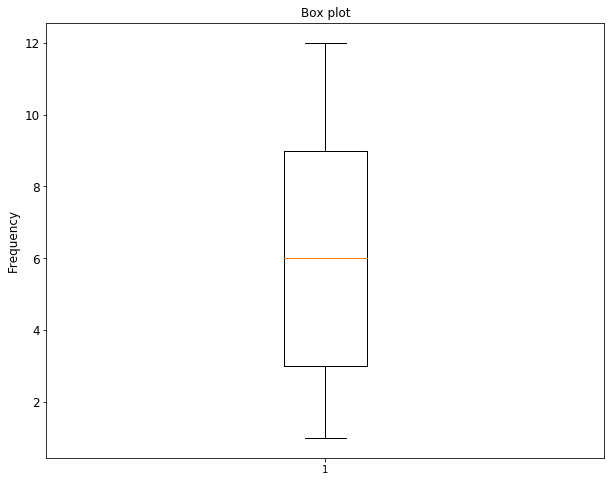

In [50]:
# matplotlib box plot

import matplotlib.pyplot as plt

plt.figure(figsize=[10,8])

plt.boxplot(df['FMONTH'])
plt.ylabel('Frequency',fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Box plot',fontsize=12)
plt.show()

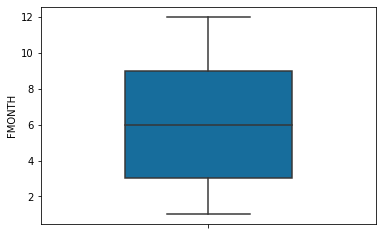

In [51]:
# seaborn box plot

import seaborn as sns

a = sns.boxplot(y='FMONTH',
             data=df, 
             width=0.5,
             palette="colorblind")


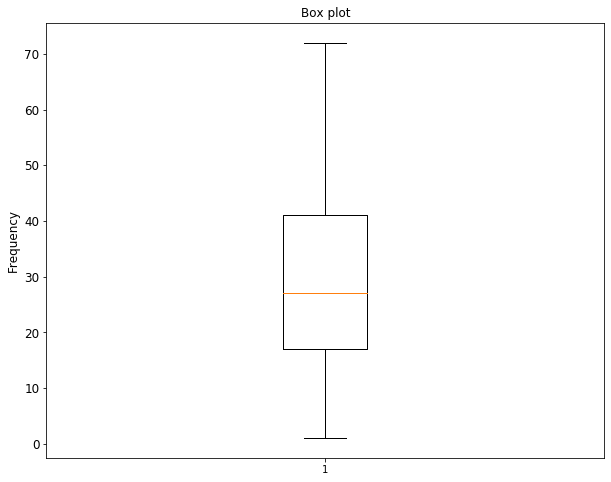

In [52]:
plt.figure(figsize=[10,8])

plt.boxplot(df['_STATE'])
plt.ylabel('Frequency',fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Box plot',fontsize=12)
plt.show()

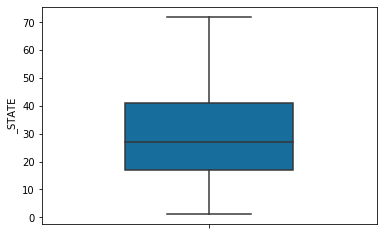

In [53]:
a = sns.boxplot(y='_STATE',
             data=df, 
             width=0.5,
             palette="colorblind")


[Go back](#goback)

<a id='h4.1'></a>
#### 4(i). Function for box plot description (Percentile Method)

In [54]:
# function for box plot description (Percentile Method)

def box_plot_desc(col):
    
    # calculate interquartile range
    q25, q75 = np.percentile(col, 25), np.percentile(col, 75)
    iqr = q75 - q25
    
    # calculate the outlier cutoff/ boundary
    cut_off = iqr * 1.5
    lower_bound, upper_bound = q25 - cut_off, q75 + cut_off
    
    # identify outliers
    outliers_by_perc = [x for x in col if x < lower_bound or x > upper_bound]
    
    print("Q1(q25): "+str(q25))
    print("Q3(q75): "+str(q75))
    print("IQR: "+str(iqr))
    print("Upper Boundary: "+str(upper_bound))
    print("Lower Boundary: "+str(lower_bound))
    print("Median: "+str(col.median()))
    print("Minimum in range: "+str(col.min()))
    print("Maximum in range: "+str(col.max()))
    print("There are "+str(len(outliers_by_perc))+" outliers that are given below:")
    print(outliers_by_perc)

    
    

In [55]:
box_plot_desc(df['_STATE'])

Q1(q25): 17.0
Q3(q75): 41.0
IQR: 24.0
Upper Boundary: 77.0
Lower Boundary: -19.0
Median: 27.0
Minimum in range: 1.0
Maximum in range: 72.0
There are 0 outliers that are given below:
[]


In [56]:
box_plot_desc(df['FMONTH'])

Q1(q25): 3.0
Q3(q75): 9.0
IQR: 6.0
Upper Boundary: 18.0
Lower Boundary: -6.0
Median: 6.0
Minimum in range: 1.0
Maximum in range: 12.0
There are 0 outliers that are given below:
[]


In [57]:
arr = [5,7,10,15,19,21,21,22,22,23,23,23,23,23,24,24,24,24,25]

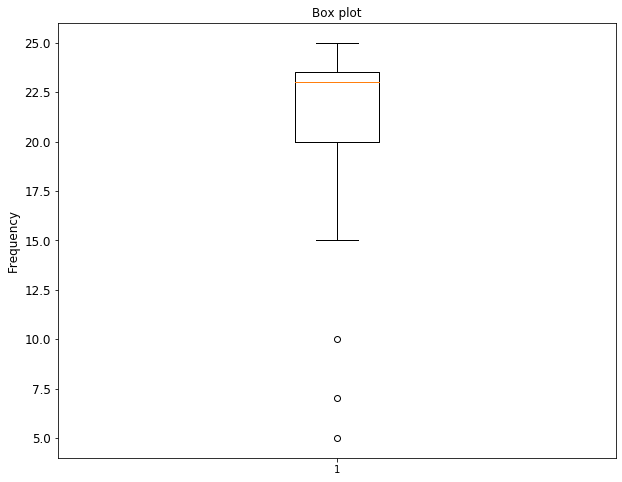

In [58]:
plt.figure(figsize=[10,8])

plt.boxplot(arr)
plt.ylabel('Frequency',fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Box plot',fontsize=12)
plt.show()

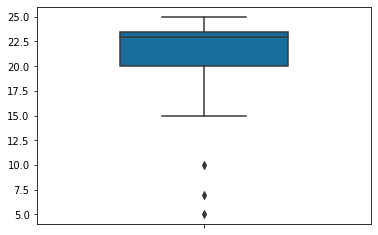

In [59]:
a = sns.boxplot(y=arr,
             data=df, 
             width=0.5,
             palette="colorblind")


In [60]:
box_plot_desc(pd.Series(arr))

Q1(q25): 20.0
Q3(q75): 23.5
IQR: 3.5
Upper Boundary: 28.75
Lower Boundary: 14.75
Median: 23.0
Minimum in range: 5
Maximum in range: 25
There are 3 outliers that are given below:
[5, 7, 10]


In [61]:
box_plot_desc(df['PHYSHLTH'].dropna())

Q1(q25): 15.0
Q3(q75): 88.0
IQR: 73.0
Upper Boundary: 197.5
Lower Boundary: -94.5
Median: 88.0
Minimum in range: 1.0
Maximum in range: 99.0
There are 0 outliers that are given below:
[]


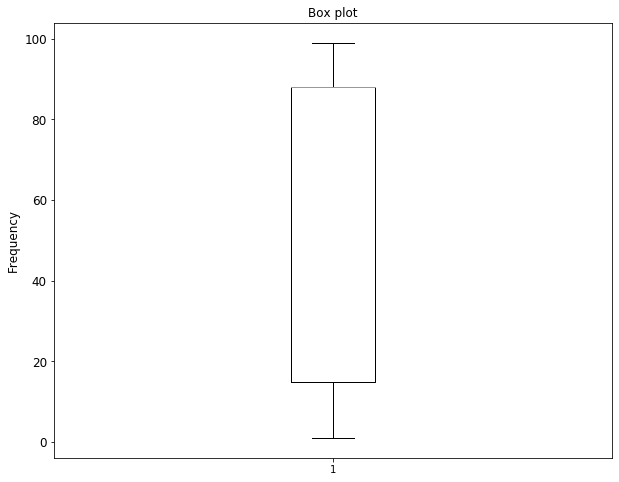

In [62]:
plt.figure(figsize=[10,8])

plt.boxplot(df['PHYSHLTH'].dropna())
plt.ylabel('Frequency',fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Box plot',fontsize=12)
plt.show()

Its Q3 and median are equal

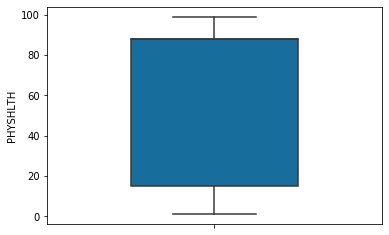

In [64]:
a = sns.boxplot(y='PHYSHLTH',
             data=df, 
             width=0.5,
             palette="colorblind")


[Go back](#goback)

<a id='h5'></a>
### 5- Scatter & Regression Plot

<a id='h5.1'></a>
#### 5(i). Method to find Best correlation vars

In [66]:
def find_best_corr(df, positive_corr_limit, neg_corr_limit):
    
    correlation = df.corr()
    
    cols = []
    rows = []

    for i in correlation:
        n = 0

        for j in correlation[i]:

            if (j >= positive_corr_limit and j < 1) or (j <= neg_corr_limit and j > -1):



                cols.append(i)
                rows.append(correlation[correlation[i] == j].index[0])
                #rows.append(n)

            n+=1
            
    return rows, cols

    
    

In [67]:
rows, cols = find_best_corr(df, 0.95, -0.95) # yahan variable assign karna h, rows or col k liye
print(rows)
print(cols)

['_STSTR', 'NUMMEN', 'NUMWOMEN', 'MISNOWRK', 'SCNTWRK1', '_CLLCPWT', '_RAWRAKE', 'LADULT', 'LADULT', '_ASTHMS1', '_EDUCAG', '_IMPEDUC', 'CADULT', '_SMOKER3', '_DRNKDY4', '_DRNKMO4', '_RFDRHV4', '_RFDRMN4', '_TOTINDA', 'PADUR1_', 'PADUR2_', '_LMTACT1', '_LMTWRK1', '_LMTSCL1', '_AIDTST3', 'HADMAM', 'ARTHEDU', 'LADULT', 'LADULT', 'SEX', '_STATE', 'NUMADULT', 'LADULT', '_AGE65YR', 'ASTHNOW', '_MRACE1', '_PRACE1', '_RACEGR3', '_RACE', '_AGE_G', '_AGE80', '_HCVU651', '_AGEG5YR', '_AGE80', 'HTM4', 'HTIN4', 'EDUCA', 'SMOKDAY2', 'AVEDRNK2', '_DRNKMO4', '_RFDRHV4', '_RFDRMN4', '_RFDRWM4', 'AVEDRNK2', '_DRNKDY4', '_RFDRHV4', '_RFDRMN4', '_RFDRWM4', 'AVEDRNK2', '_DRNKDY4', '_DRNKMO4', 'AVEDRNK2', '_DRNKDY4', '_DRNKMO4', '_DRNKDY4', '_DRNKMO4', '_FRTRESP', '_FRUITEX', '_MISFRTN', '_FRTLT1', '_FRUITEX', '_VEGLT1', '_VEGETEX', '_FRTRESP', '_FRUITEX', '_VEGRESP', '_VEGETEX', '_MISFRTN', '_FRTRESP', '_FRTLT1', '_VEGRESP', '_VEGLT1', 'EXERANY2', 'PAMISS1_', 'FC60_', 'MAXVO2_', 'EXERHMM1', 'EXERHMM2', '_

In [73]:
# Now we'll make dataframe of correlated vars with their correlation strength.

In [94]:
def corr_vars_df(df, rows, cols):
    
    corrs = []

    for i in range(len(rows)):

        a = df[cols[i]].corr(df[rows[i]])
        corrs.append(round(a,2))
    
    correlated_vars = pd.DataFrame({'A': cols,
                                    'B': rows,
                                    'Correlation Strength': corrs})

    return correlated_vars

In [95]:
corr_vars_info = corr_vars_df(df, rows, cols)
corr_vars_info

,A,B,Correlation Strength
0,_STATE,_STSTR,1.00
1,LADULT,NUMMEN,-1.00
2,LADULT,NUMWOMEN,1.00
3,LADULT,MISNOWRK,0.97
4,LADULT,SCNTWRK1,0.96
...,...,...,...
99,_RFSEAT3,_RFSEAT2,0.99
100,_AIDTST3,HIVTST6,0.99
101,_AGE80,_AGEG5YR,0.98
102,_AGE80,_AGE_G,0.97


In [96]:
# Make scatter plot & reg plot of some high strength corelated vars.

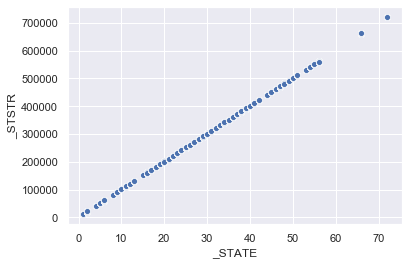

In [68]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x="_STATE", y="_STSTR", data=df)

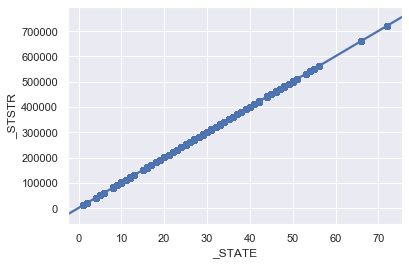

In [69]:
# reg plot
import seaborn as sns; sns.set(color_codes=True)

ax = sns.regplot(x="_STATE", y="_STSTR", data=df)

In [97]:
len(df['NUMMEN'].value_counts())

14

In [98]:
df['MISNOWRK'].corr(df['LADULT'])

0.9699717540882922

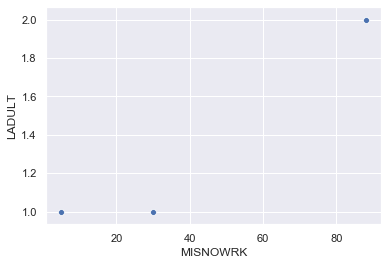

In [99]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x="MISNOWRK", y="LADULT", data=df)

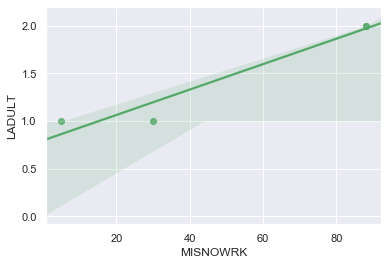

In [100]:
ax = sns.regplot(x="MISNOWRK", y="LADULT", data=df, color = 'g')

In [105]:
# now create plot for neg correlated vars

In [101]:
correlated_vars[correlated_vars['Correlation Strength'] < 0]

,A,B,Correlation Strength
1,LADULT,NUMMEN,-1.00
7,NUMMEN,LADULT,-1.00
66,_MISFRTN,_FRTRESP,-0.96
68,_FRTRESP,_MISFRTN,-0.96
69,_FRTRESP,_FRTLT1,-0.98
70,_FRTRESP,_FRUITEX,-0.99
71,_VEGRESP,_VEGLT1,-0.99
72,_VEGRESP,_VEGETEX,-1.00
73,_FRTLT1,_FRTRESP,-0.98
75,_VEGLT1,_VEGRESP,-0.99


In [102]:
len(df['_FRTLT1'].value_counts())

3

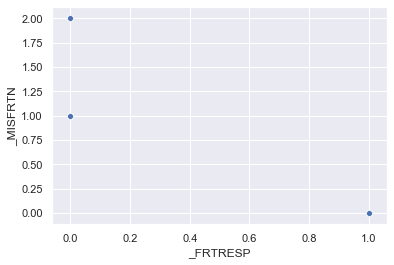

In [103]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x="_FRTRESP", y="_MISFRTN", data=df)

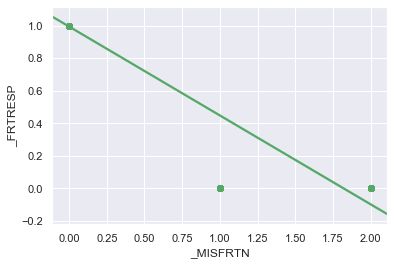

In [104]:
ax = sns.regplot(x="_MISFRTN", y="_FRTRESP", data=df, color = 'g')

[Go back](#goback)

<a id='h6'></a>
### 6. Bar chart 

In [107]:
df['FMONTH'].value_counts()

7.0     47639
1.0     46003
10.0    45007
4.0     44861
2.0     40549
3.0     40314
8.0     39660
5.0     39362
11.0    38348
6.0     37118
9.0     36833
12.0    36079
Name: FMONTH, dtype: int64

In [110]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

FMONTH_in_words = []

a = df['FMONTH'].tolist()

for i in a:
    
    FMONTH_in_words.append(months[int(i)-1])
    
FMONTH_in_words
    
    

['Jan',
 'Jan',
 'Jan',
 'Jan',
 'Feb',
 'Mar',
 'Mar',
 'Mar',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'May',
 'Jun',
 'Jun',
 'Jun',
 'May',
 'Jun',
 'Jun',
 'Jun',
 'Jun',
 'Jun',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Sep',
 'Sep',
 'Sep',
 'Nov',
 'Nov',
 'Oct',
 'Oct',
 'Oct',
 'Nov',
 'Nov',
 'Nov',
 'Dec',
 'Dec',
 'Dec',
 'Jan',
 'Jan',
 'May',
 'May',
 'Jun',
 'Jun',
 'Jul',
 'Jul',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Nov',
 'Nov',
 'Nov',
 'Dec',
 'Dec',
 'Feb',
 'Apr',
 'Oct',
 'Apr',
 'Oct',
 'Oct',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Jan',
 'Mar',
 'Mar',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',


In [112]:
# check month in words
print(FMONTH_in_words[:10])
print(a[:10])

['Jan', 'Jan', 'Jan', 'Jan', 'Feb', 'Mar', 'Mar', 'Mar', 'Apr', 'Apr']
[1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0]


In [113]:
df['FMONTH_in_WORDS'] = FMONTH_in_words

df['FMONTH_in_WORDS'].head()

0    Jan
1    Jan
2    Jan
3    Jan
4    Feb
Name: FMONTH_in_WORDS, dtype: object

In [114]:
df['FMONTH_in_WORDS'].value_counts()

Jul    47639
Jan    46003
Oct    45007
Apr    44861
Feb    40549
Mar    40314
Aug    39660
May    39362
Nov    38348
Jun    37118
Sep    36833
Dec    36079
Name: FMONTH_in_WORDS, dtype: int64

In [115]:
month_dist_df = df['FMONTH_in_WORDS'].value_counts().to_frame()

month_dist_df.reset_index(inplace=True)

cols = ['Month', 'Count']

month_dist_df.columns = cols

month_dist_df

,Month,Count
0,Jul,47639
1,Jan,46003
2,Oct,45007
3,Apr,44861
4,Feb,40549
5,Mar,40314
6,Aug,39660
7,May,39362
8,Nov,38348
9,Jun,37118


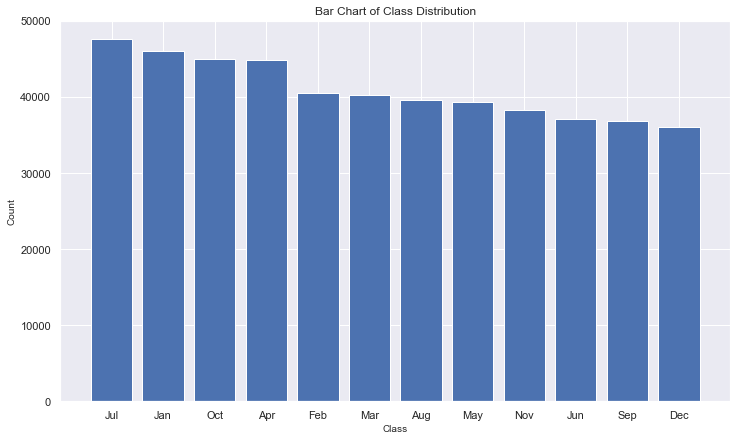

In [116]:
# Visualizing class distribution

import matplotlib.pyplot as plt
class_name = month_dist_df['Month']
count = month_dist_df['Count']
plt.figure(figsize=(12,7))
plt.bar(class_name, count)
plt.title('Bar Chart of Class Distribution')
plt.xlabel("Class", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.show()

[Go back](#goback)

<a id='h7'></a>
### 7. Side by side box plot

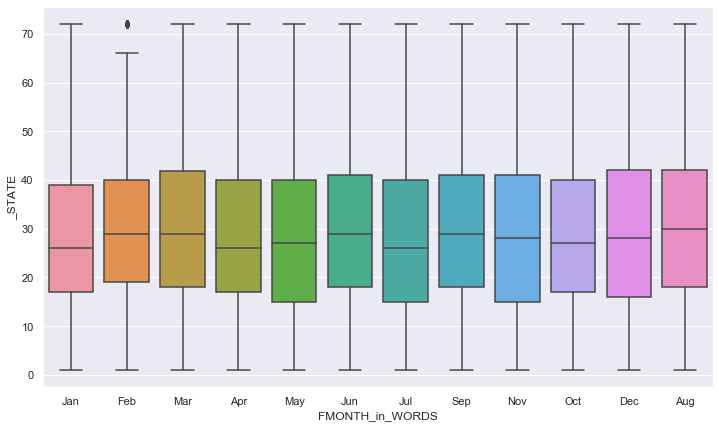

In [118]:
sns.set()
plt.figure(figsize=(12,7))
sns.boxplot(x = 'FMONTH_in_WORDS', y = '_STATE', data = df) # vertical box plot



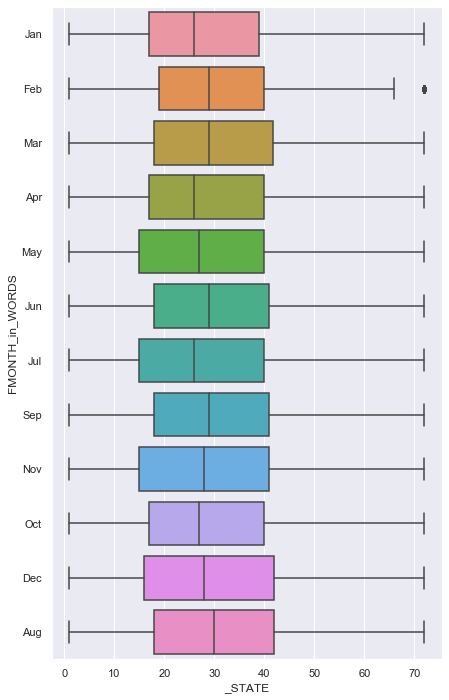

In [119]:
# horizontal box plot

plt.figure(figsize=(7,12))
sns.boxplot(x = '_STATE', y = 'FMONTH_in_WORDS', data = df) # vertical box plot


In [127]:
# Now make side by side box plot bny using _STSTR variable

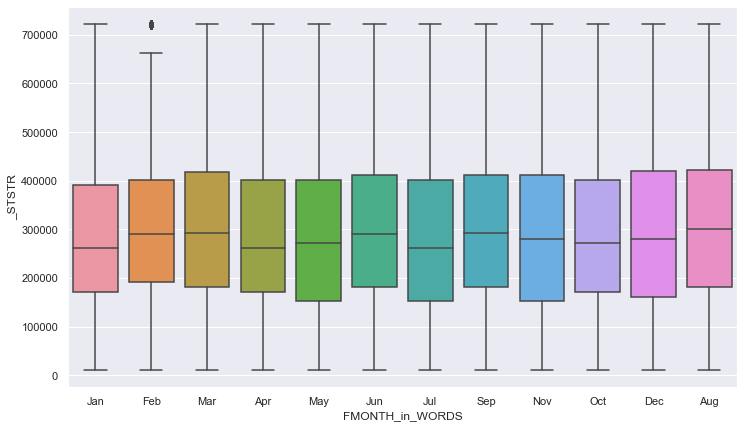

In [128]:
plt.figure(figsize=(12,7))
sns.boxplot(x = 'FMONTH_in_WORDS', y = '_STSTR', data = df) # vertical box plot

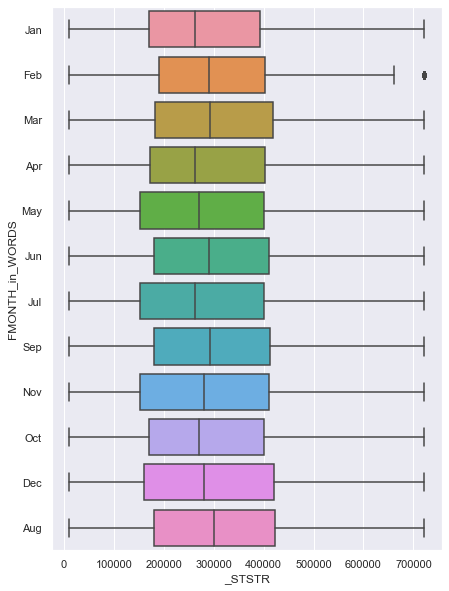

In [129]:
plt.figure(figsize=(7,10))
sns.boxplot(x = '_STSTR', y = 'FMONTH_in_WORDS', data = df) # horizontal box plot

[Go back](#goback)

<a id='h8'></a>
### 8. Row & Column Proportion

In [131]:
# Make relative frequency table

In [132]:
diff_saving = ['very', 'somewhat', 'not very', 'not at all', 'not sure']
less_than_40k = [128,54,17,3,0]
middle_40_to_80 = [63, 71,7 , 6, 1]
great_than_80 = [31,61, 27, 5, 0]
refused = [9, 10, 7, 0, 0]



In [133]:
relative_freq = pd.DataFrame({'Difficulty Saving': diff_saving,
                             '<40k': less_than_40k,
                            '40k-80k': middle_40_to_80,
                            '>80k': great_than_80, 
                            'Refused': refused})

relative_freq

,Difficulty Saving,<40k,40k-80k,>80k,Refused
0,very,128,63,31,9
1,somewhat,54,71,61,10
2,not very,17,7,27,7
3,not at all,3,6,5,0
4,not sure,0,1,0,0


In [134]:
abc = ['Total', sum(relative_freq['<40k']), sum(relative_freq['40k-80k']),
       sum(relative_freq['>80k']), sum(relative_freq['Refused'])]

abc

['Total', 202, 148, 124, 26]

In [135]:
# Pass a series in append() to append a row in dataframe  
relative_freq = relative_freq.append(pd.Series(abc, index=relative_freq.columns ), ignore_index=True)
relative_freq

,Difficulty Saving,<40k,40k-80k,>80k,Refused
0,very,128,63,31,9
1,somewhat,54,71,61,10
2,not very,17,7,27,7
3,not at all,3,6,5,0
4,not sure,0,1,0,0
5,Total,202,148,124,26


In [136]:
relative_freq['Total'] = relative_freq['<40k']+relative_freq['40k-80k']+relative_freq['>80k']+relative_freq['Refused']
relative_freq['Total']

0    231
1    196
2     58
3     14
4      1
5    500
Name: Total, dtype: int64

In [137]:
relative_freq

,Difficulty Saving,<40k,40k-80k,>80k,Refused,Total
0,very,128,63,31,9,231
1,somewhat,54,71,61,10,196
2,not very,17,7,27,7,58
3,not at all,3,6,5,0,14
4,not sure,0,1,0,0,1
5,Total,202,148,124,26,500


In [138]:
# reset index difficulty saving

relative_freq.set_index("Difficulty Saving", inplace = True)
relative_freq

,<40k,40k-80k,>80k,Refused,Total
Difficulty Saving,,,,,
very,128,63,31,9,231
somewhat,54,71,61,10,196
not very,17,7,27,7,58
not at all,3,6,5,0,14
not sure,0,1,0,0,1
Total,202,148,124,26,500


In [139]:
# now we can find 2 important info from that table
# 1- row proportion
# 2- column proportion

In [140]:
# 1- row proportion

round((relative_freq.loc['very']['<40k']) / (relative_freq.loc['very']['Total']),2)


0.55

In [141]:
indices = relative_freq.index
cols = relative_freq.columns
proportion_matrix = []

for i in range(len(indices)-1):
    
    proportions = []
    
    for j in range(len(cols)-1):
        proportion = relative_freq.loc[indices[i]][cols[j]] / relative_freq.loc[indices[i]]['Total'] 
        proportions.append(round(proportion,2))
        
    proportion_matrix.append(proportions)
    
proportion_matrix

[[0.55, 0.27, 0.13, 0.04],
 [0.28, 0.36, 0.31, 0.05],
 [0.29, 0.12, 0.47, 0.12],
 [0.21, 0.43, 0.36, 0.0],
 [0.0, 1.0, 0.0, 0.0]]

In [142]:
indices = list(relative_freq.index)
del(indices[-1])

cols = list(relative_freq.columns)
del(cols[-1])

row_proportion_table = pd.DataFrame(proportion_matrix, index = indices, columns = cols)
row_proportion_table

,<40k,40k-80k,>80k,Refused
very,0.55,0.27,0.13,0.04
somewhat,0.28,0.36,0.31,0.05
not very,0.29,0.12,0.47,0.12
not at all,0.21,0.43,0.36,0.00
not sure,0.00,1.00,0.00,0.00


### Row Proportion desc

It is used for distributing data of a single row.<br>

e.g<br>
#### very main:
55% <b> less than 40k</b> waly hain <br>
27% <b> b/w 40k-80k</b> waly hain<br>
13% <b> greater than 80k</b> waly hain<br>
4% <b> Refused to get the answer</b> waly hain

In [143]:
# 2- Column Proportion Table

round((relative_freq.loc['very']['<40k']) / (relative_freq.loc['Total']['<40k']),2)


0.63

In [144]:
indices = relative_freq.index
cols = relative_freq.columns
proportion_matrix = []

for i in range(len(indices)-1):
    
    proportions = []
    
    for j in range(len(cols)-1):
        proportion = relative_freq.loc[indices[i]][cols[j]] / relative_freq.loc['Total'][cols[j]] 
        proportions.append(round(proportion,2))
        
    proportion_matrix.append(proportions)
    
proportion_matrix

[[0.63, 0.43, 0.25, 0.35],
 [0.27, 0.48, 0.49, 0.38],
 [0.08, 0.05, 0.22, 0.27],
 [0.01, 0.04, 0.04, 0.0],
 [0.0, 0.01, 0.0, 0.0]]

In [145]:
indices = list(relative_freq.index)
del(indices[-1])

cols = list(relative_freq.columns)
del(cols[-1])

col_proportion_table = pd.DataFrame(proportion_matrix, index = indices, columns = cols)
col_proportion_table

,<40k,40k-80k,>80k,Refused
very,0.63,0.43,0.25,0.35
somewhat,0.27,0.48,0.49,0.38
not very,0.08,0.05,0.22,0.27
not at all,0.01,0.04,0.04,0.00
not sure,0.00,0.01,0.00,0.00


### Row Proportion desc

It is used for distributing data of a single row.<br>

e.g<br>
#### <40k main:
63%<b> very</b> waly hain <br>
27% <b> somewhat</b> waly hain<br>
8% <b> not very</b> waly hain<br>
1% <b> not at all</b> waly hain<br>
0% <b> not sure</b> waly hain

In [146]:
# segmented barplot

relative_freq

,<40k,40k-80k,>80k,Refused,Total
Difficulty Saving,,,,,
very,128,63,31,9,231
somewhat,54,71,61,10,196
not very,17,7,27,7,58
not at all,3,6,5,0,14
not sure,0,1,0,0,1
Total,202,148,124,26,500


In [147]:
relative_freq_without_total = relative_freq.copy()
relative_freq_without_total.drop('Total', axis = 1, inplace = True)
relative_freq_without_total.drop('Total', axis = 0, inplace = True)
relative_freq_without_total

,<40k,40k-80k,>80k,Refused
Difficulty Saving,,,,
very,128,63,31,9
somewhat,54,71,61,10
not very,17,7,27,7
not at all,3,6,5,0
not sure,0,1,0,0


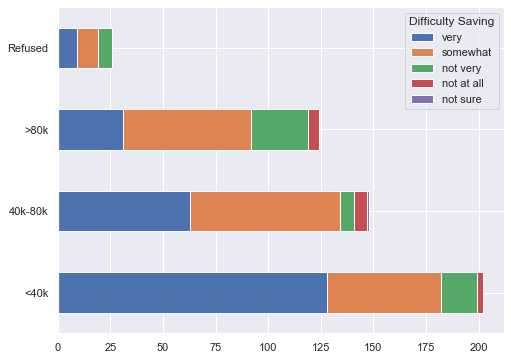

In [148]:
import seaborn as sns
sns.set()

relative_freq_without_total.T.plot(kind='barh', stacked=True, figsize=(8,6))


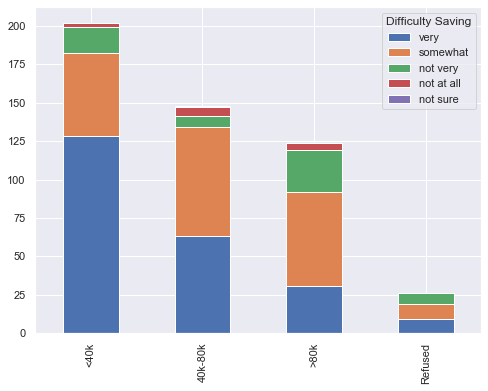

In [149]:
import seaborn as sns
sns.set()

relative_freq_without_total.T.plot(kind='bar', stacked=True, figsize=(8,6))


In [150]:
# Now we'll create bar plot that consist of percentages

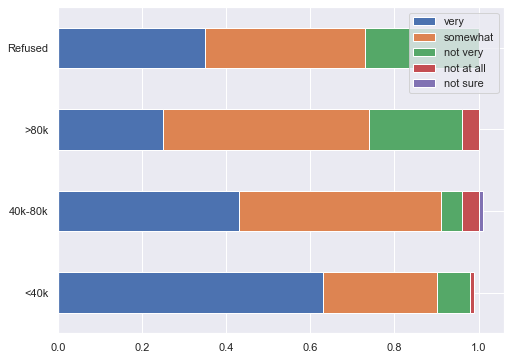

In [151]:
sns.set()

col_proportion_table.T.plot(kind='barh', stacked=True, figsize=(8,6))

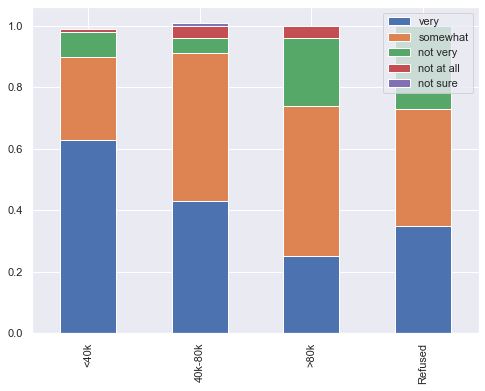

In [152]:
col_proportion_table.T.plot(kind='bar', stacked=True, figsize=(8,6))

In [153]:
# mosaic plots can be more usefull, but I'll create them whenever their need will come.

In [154]:
# Now make df of e-mail data

In [155]:
category = ['spam', 'not spam']
none = [149, 400]
small = [168, 2659]
big = [50, 495]

mail_cat_table = pd.DataFrame({'Category':  category,
                              'none': none,
                              'small': small,
                              'big': big})

abc = ['Total', sum(mail_cat_table['none']), sum(mail_cat_table['small']), sum(mail_cat_table['big'])]

mail_cat_table = mail_cat_table.append(pd.Series(abc, index=mail_cat_table.columns ), ignore_index=True)

mail_cat_table['Total'] = mail_cat_table['none']+mail_cat_table['small']+mail_cat_table['big']

mail_cat_table.set_index('Category', inplace = True)

mail_cat_table

,none,small,big,Total
Category,,,,
spam,149,168,50,367
not spam,400,2659,495,3554
Total,549,2827,545,3921


[Go back](#goback)

<a id='h8.1'></a>
#### 8(i) Row Proportion Function

In [156]:
# creating function for row proportion table

def make_row_proportion_table(df):

    indices = list(df.index)
    cols = list(df.columns)
    proportion_matrix = []

    for i in range(len(indices)-1):

        proportions = []

        for j in range(len(cols)-1):
            proportion = df.loc[indices[i]][cols[j]] / df.loc[indices[i]]['Total'] 
            proportions.append(round(proportion,2))

        proportion_matrix.append(proportions)
        

        
    
    del(indices[-1])


    del(cols[-1])

    row_proportion_table = pd.DataFrame(proportion_matrix, index = indices, columns = cols)
    return row_proportion_table

In [157]:
make_row_proportion_table(mail_cat_table)

,none,small,big
spam,0.41,0.46,0.14
not spam,0.11,0.75,0.14


[Go back](#goback)

<a id='h8.2'></a>
#### 8(ii) Column Proportion Function

In [158]:
# creating function for col proportion table

def make_col_proportion_table(df):

    indices = list(df.index)
    cols = list(df.columns)
    proportion_matrix = []

    for i in range(len(indices)-1):

        proportions = []

        for j in range(len(cols)-1):
            proportion = df.loc[indices[i]][cols[j]] / df.loc['Total'][cols[j]] 
            proportions.append(round(proportion,2))

        proportion_matrix.append(proportions)
        

        
    
    del(indices[-1])


    del(cols[-1])

    col_proportion_table = pd.DataFrame(proportion_matrix, index = indices, columns = cols)
    return col_proportion_table

In [159]:
make_col_proportion_table(mail_cat_table)

,none,small,big
spam,0.27,0.06,0.09
not spam,0.73,0.94,0.91


In [160]:
mail_cat_table_without_total = mail_cat_table.copy()
mail_cat_table_without_total.drop('Total', axis = 1, inplace = True)
mail_cat_table_without_total.drop('Total', axis = 0, inplace = True)
mail_cat_table_without_total

,none,small,big
Category,,,
spam,149,168,50
not spam,400,2659,495


[Go back](#goback)

<a id='h9'></a>
### 9. Stacked Bar Chart or Segmented bar plot

<a id='h9.1'></a>
#### 9(i) Stacked Bar Chart with Numbers

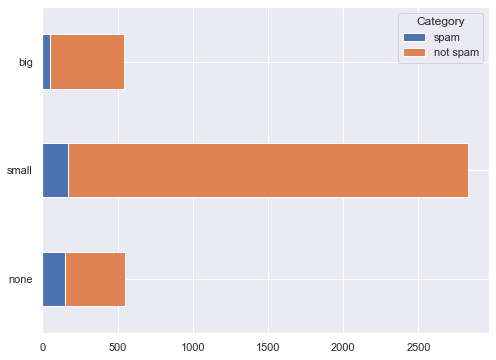

In [161]:
sns.set()

mail_cat_table_without_total.T.plot(kind='barh', stacked=True, figsize=(8,6))

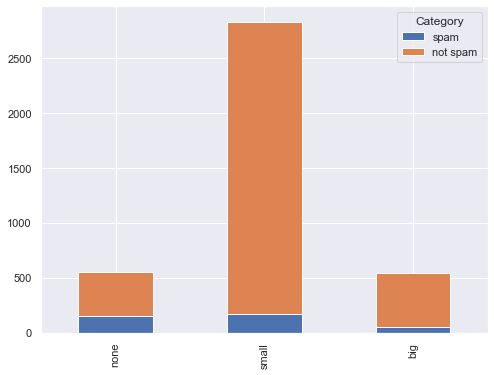

In [162]:
mail_cat_table_without_total.T.plot(kind='bar', stacked=True, figsize=(8,6))

In [163]:
col_prop_table = make_col_proportion_table(mail_cat_table)
col_prop_table

,none,small,big
spam,0.27,0.06,0.09
not spam,0.73,0.94,0.91


[Go back](#goback)

<a id='h9.2'></a>
#### 9(ii) Stacked Bar chart with proportion

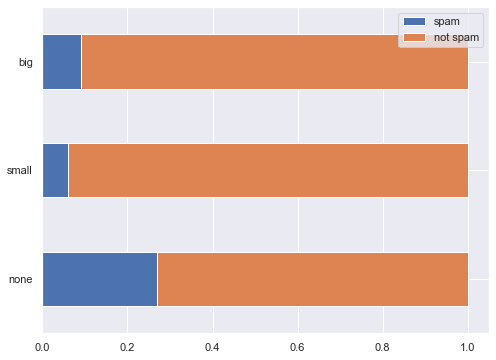

In [164]:
col_prop_table.T.plot(kind='barh', stacked=True, figsize=(8,6))

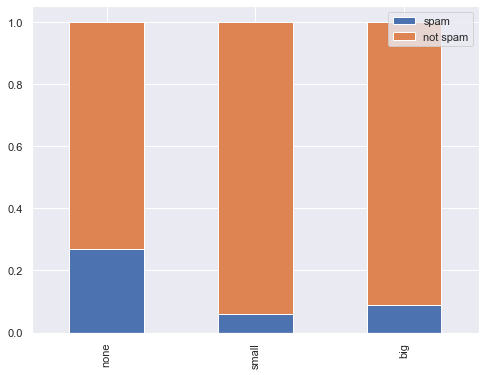

In [165]:
col_prop_table.T.plot(kind='bar', stacked=True, figsize=(8,6))

[Go back](#goback)

In [166]:
# Proportion stacked bar chart is more useful for us because it is giving more specific information.

# Project Ended